In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path="/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(csv_path)


**1. Exploratory Data Analysis (EDA)**

In [50]:
# Display basic information about the dataset
info = data.info()
data_head = data.head()
data_description = data.describe()

# Print the information
print(info)
print(data_head)
print(data_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
data.shape

(7043, 21)

In [52]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
#Find unique value counts in each column
for i, col in enumerate(data.columns):
    print(col, 'column unique value count:', data[col].nunique())


customerID column unique value count: 7043
gender column unique value count: 2
SeniorCitizen column unique value count: 2
Partner column unique value count: 2
Dependents column unique value count: 2
tenure column unique value count: 73
PhoneService column unique value count: 2
MultipleLines column unique value count: 3
InternetService column unique value count: 3
OnlineSecurity column unique value count: 3
OnlineBackup column unique value count: 3
DeviceProtection column unique value count: 3
TechSupport column unique value count: 3
StreamingTV column unique value count: 3
StreamingMovies column unique value count: 3
Contract column unique value count: 3
PaperlessBilling column unique value count: 2
PaymentMethod column unique value count: 4
MonthlyCharges column unique value count: 1585
TotalCharges column unique value count: 6531
Churn column unique value count: 2


In [4]:
#TotalCharges seems ambiguious, convert to a numeric data type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
#Check for null values in the TotalCharges column
print(data['TotalCharges'].isnull().sum())

#Replace null datatypes with the median value of the column
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_total_charges, inplace=True)

#Check for null values in the TotalCharges column
print(data['TotalCharges'].isnull().sum())

11
0


/tmp/ipykernel_33/1689797248.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(median_total_charges, inplace=True)


In [56]:
#Further confirm that TotalCharges column is functional
print(data['TotalCharges'].describe())

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


**Univariate Analysis**

In [57]:
# Identify binary variables
binary_columns = [col for col in data.columns if data[col].dropna().isin([0, 1]).all()]
print(binary_columns)

['SeniorCitizen']


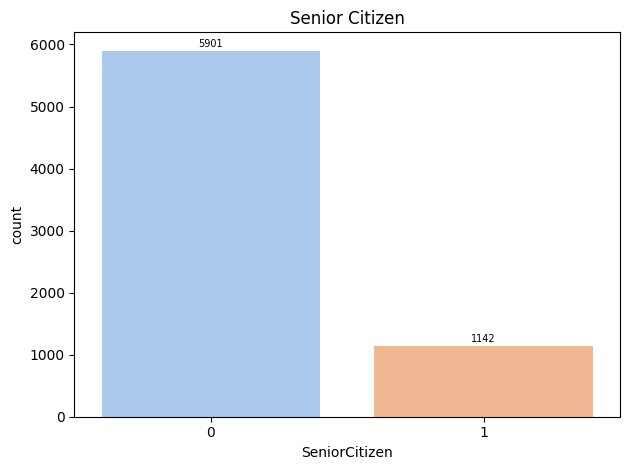

In [58]:
# Visualize the binary variable
ax= sns.countplot(x=data['SeniorCitizen'], palette='pastel')
plt.title('Senior Citizen')
plt.tight_layout()
#Annotate each bar in the current plot
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

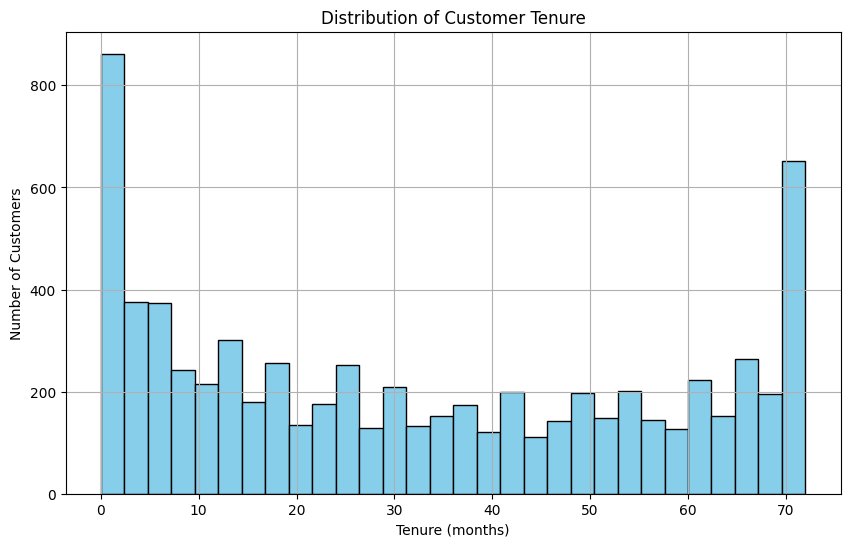

In [59]:
# Plotting the tenure column as a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

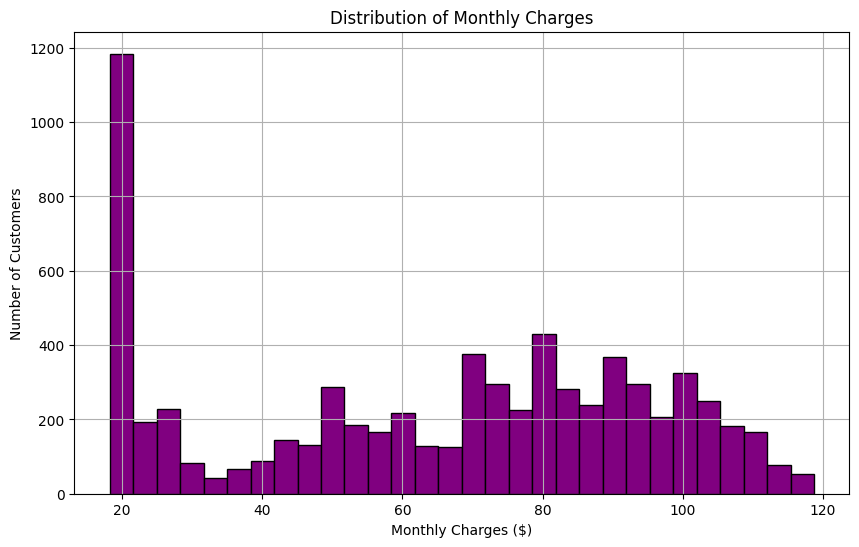

In [60]:
# Plotting the MonthlyCharges column as a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['MonthlyCharges'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


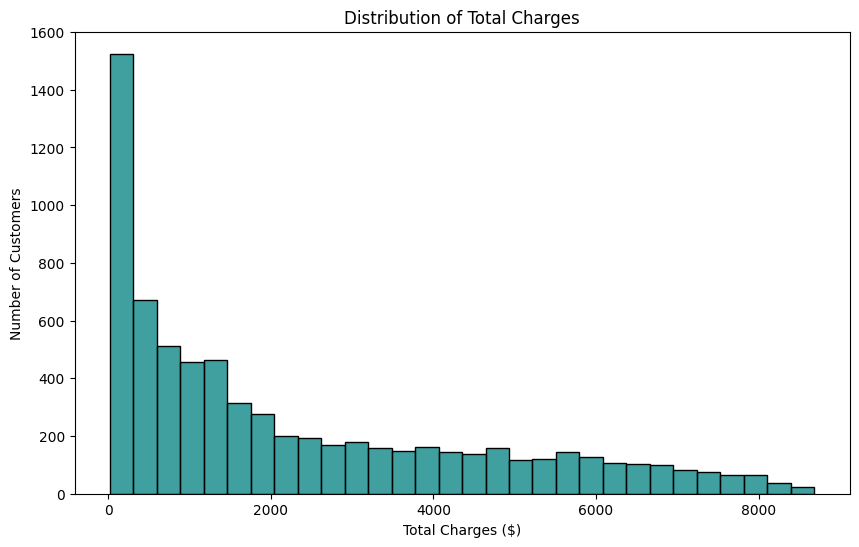

In [61]:
# Plotting the TotalCharges column as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalCharges'], color='teal', bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Number of Customers')
plt.show()

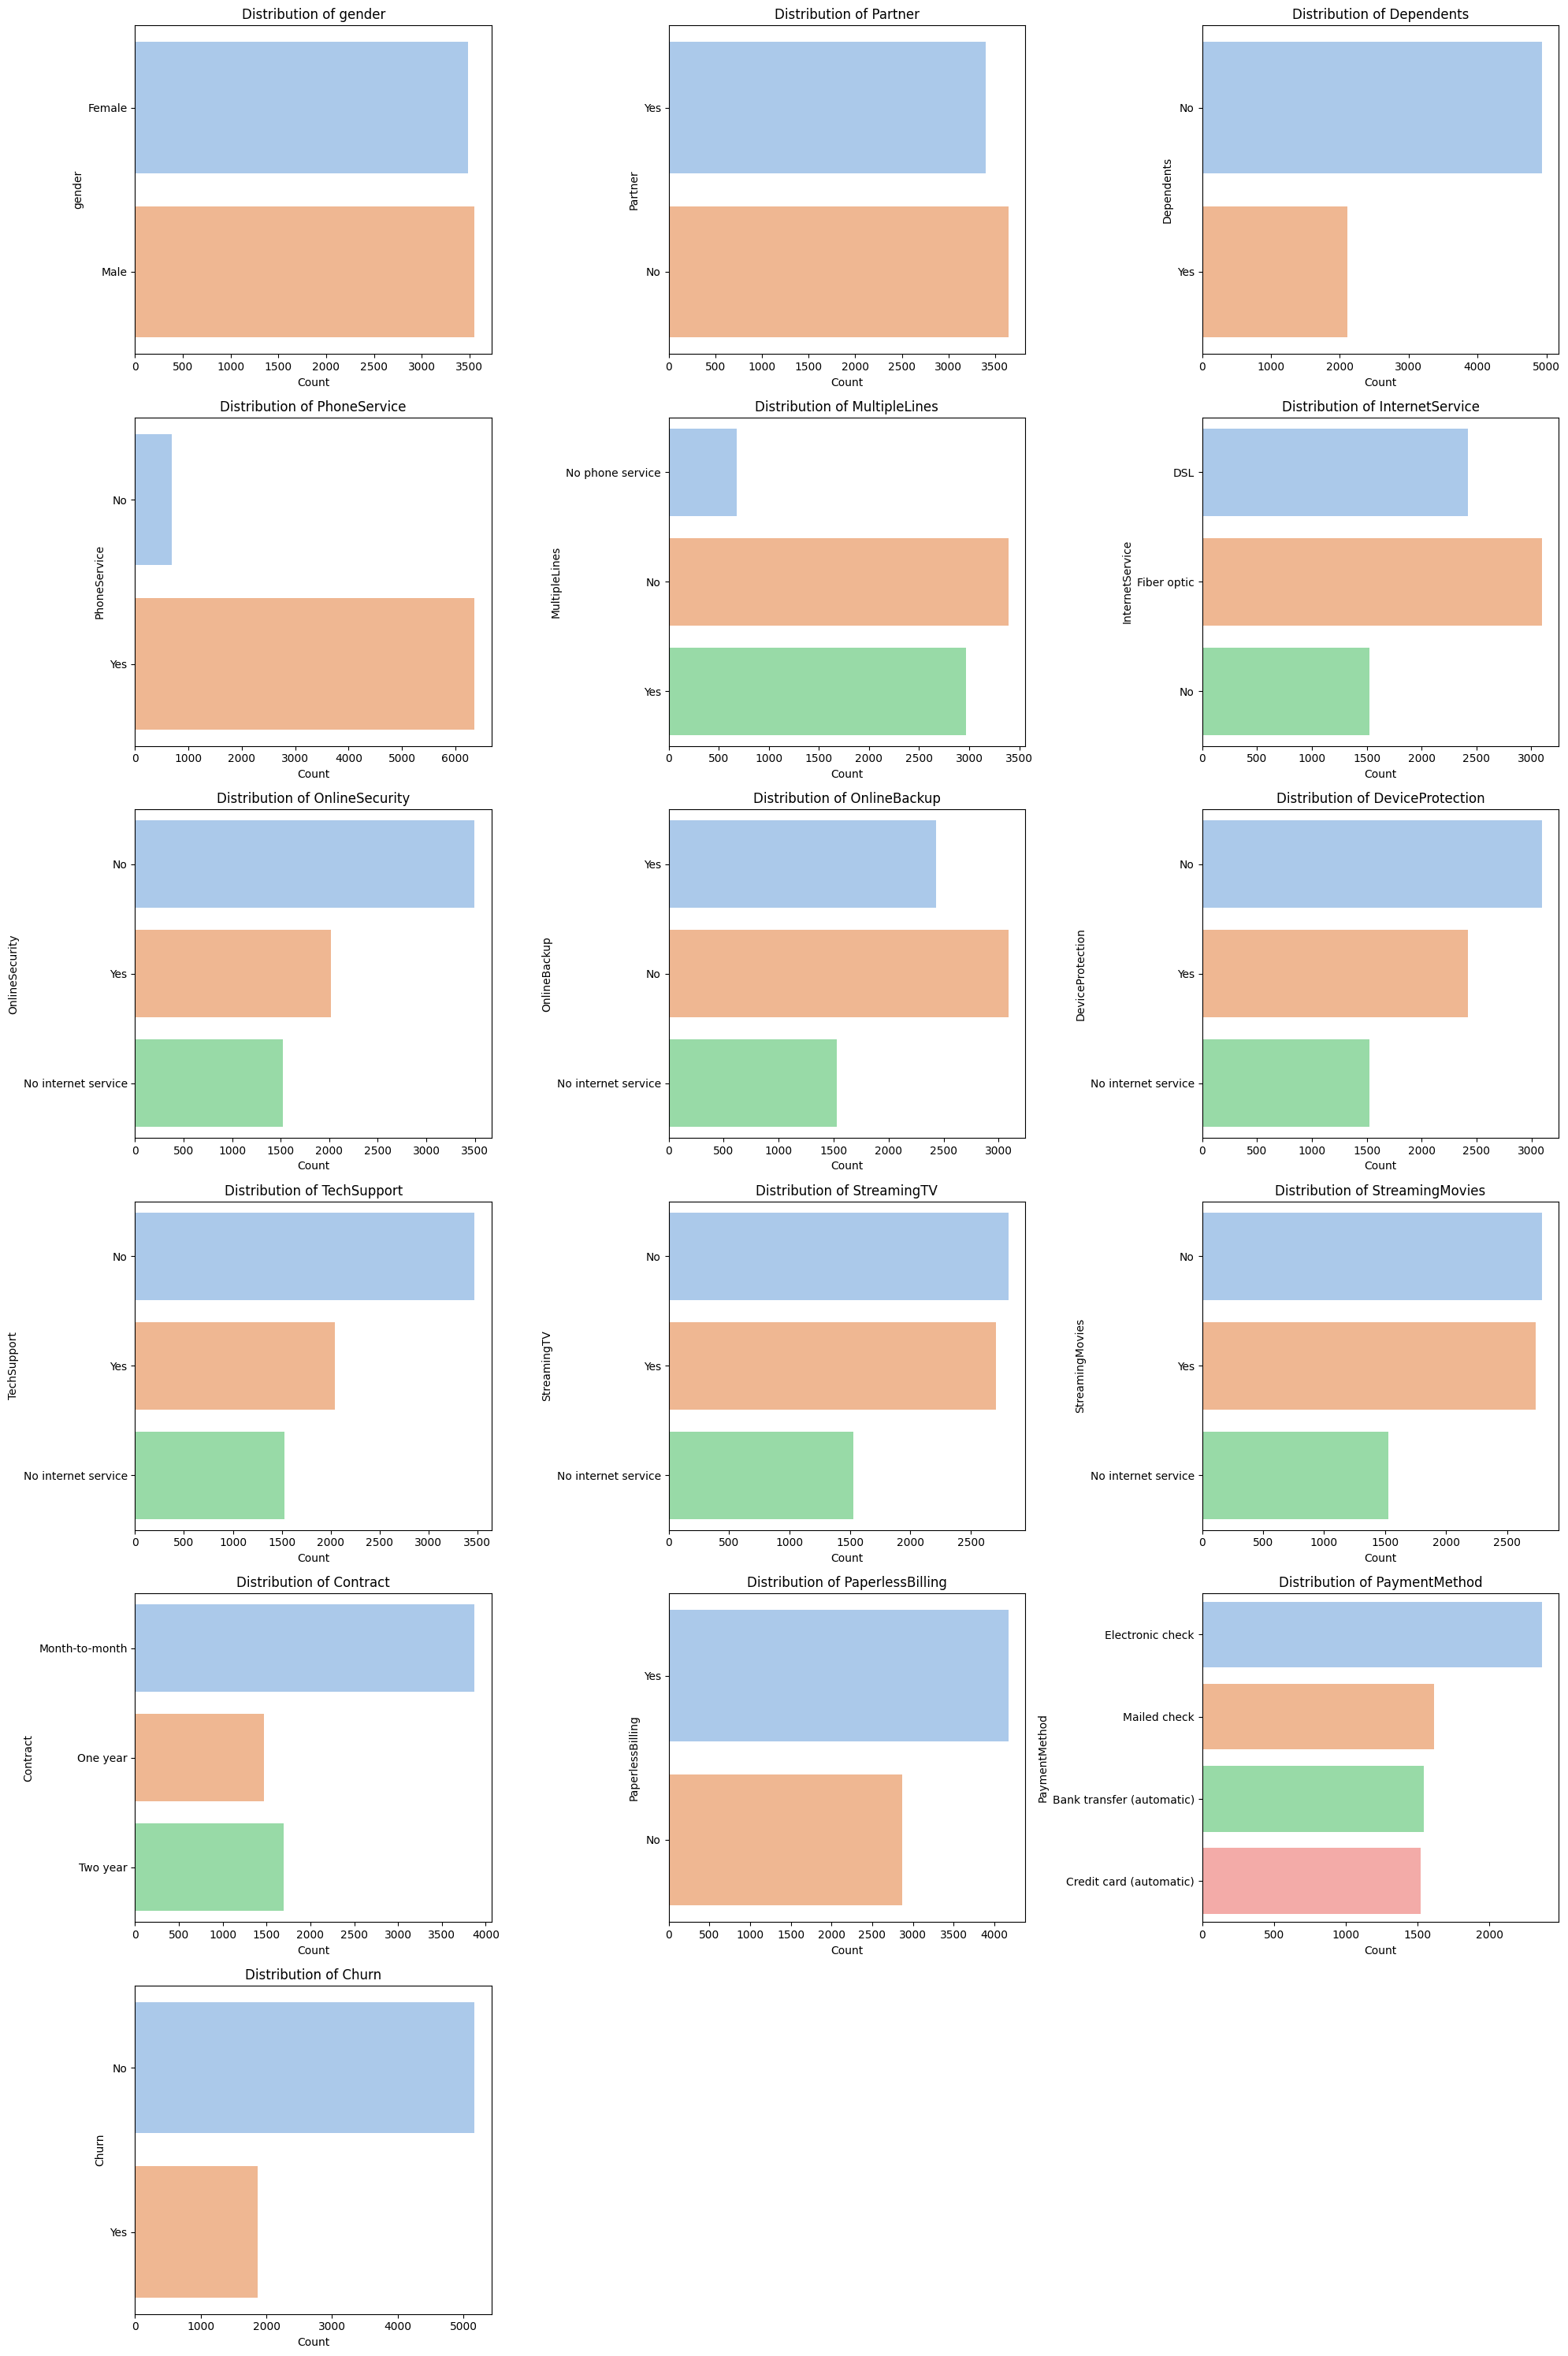

In [6]:
#Plotting Categorical Variables as Bar Charts
# Setting up the figure size and layout
plt.figure(figsize=(20, 30))
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Plotting bar charts for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)  
    sns.countplot(y=column, data=data, palette='pastel')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

**Bivariate Analysis**

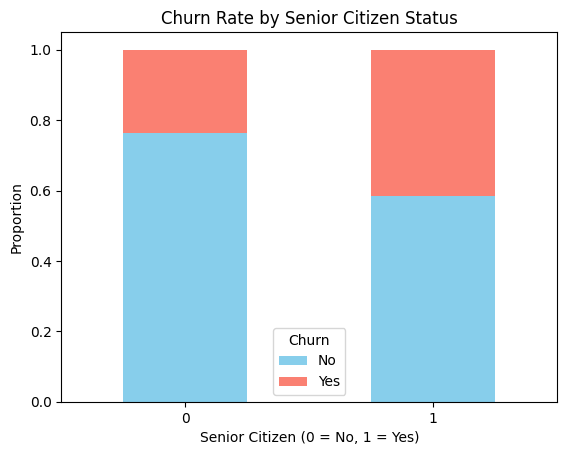

Chi-square statistic: 159.42630036838742, p-value: 1.510066805092378e-36


In [63]:
# Create a cross-tabulation
cross_tab = pd.crosstab(data['SeniorCitizen'], data['Churn'])

# Create a stacked bar chart
cross_tab.div(cross_tab.sum(1), axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for readability

# Perform a chi-square test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(cross_tab)

plt.show()
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

In [64]:
print(data.groupby('Churn')['tenure'].describe())

        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


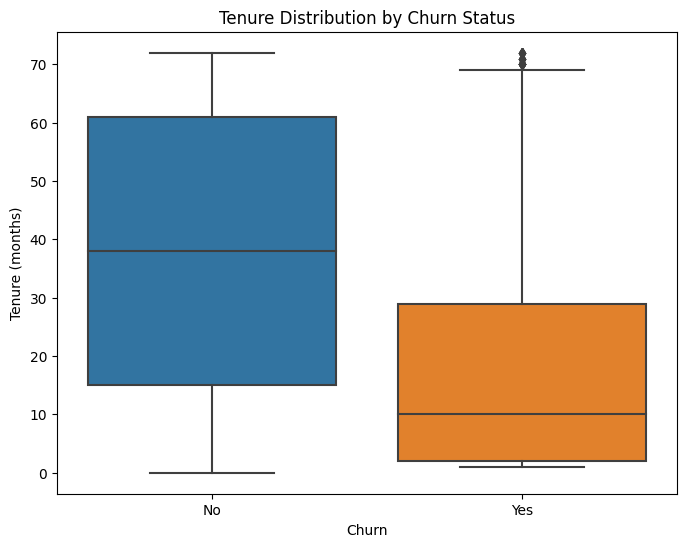

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

In [66]:
from scipy.stats import mannwhitneyu

# Separate the data into groups based on Churn status
tenure_churned = data[data['Churn'] == 'Yes']['tenure']
tenure_not_churned = data[data['Churn'] == 'No']['tenure']

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(tenure_churned, tenure_not_churned, alternative='two-sided')

print(f'Mann-Whitney U statistic: {statistic}, p-value: {p_value}')

Mann-Whitney U statistic: 2515538.0, p-value: 2.419635517951866e-208


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


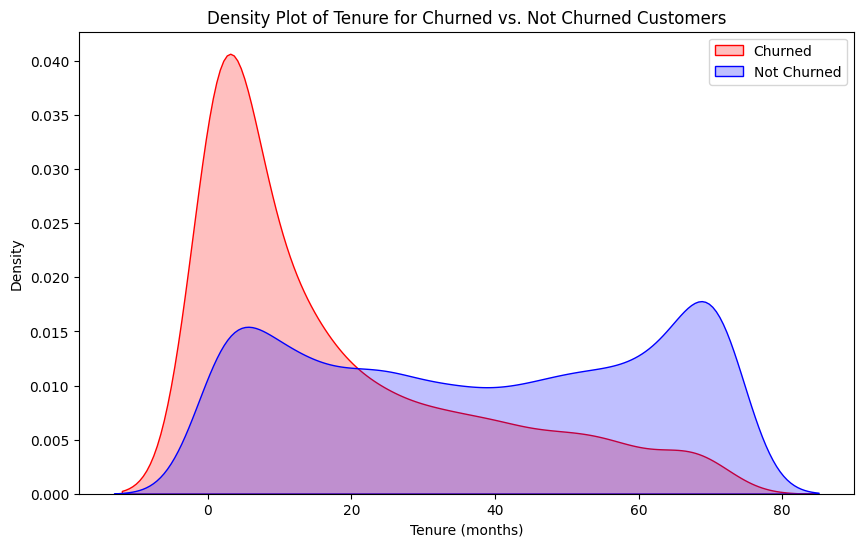

In [67]:
# Setting up the figure for KDE plots
plt.figure(figsize=(10, 6))

# KDE plot for customers who have churned
sns.kdeplot(data[data['Churn'] == 'Yes']['tenure'], label='Churned', color='red', fill=True)

# KDE plot for customers who have not churned
sns.kdeplot(data[data['Churn'] == 'No']['tenure'], label='Not Churned', color='blue', fill=True)

plt.title('Density Plot of Tenure for Churned vs. Not Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


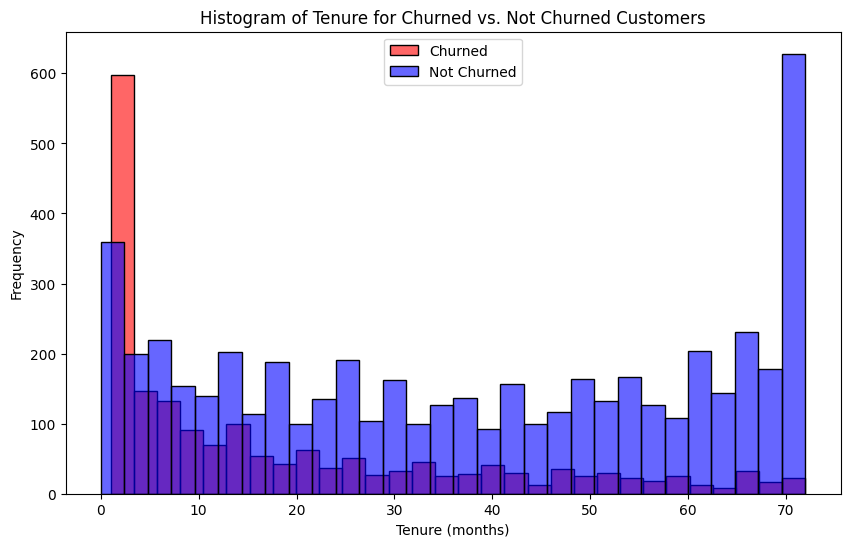

In [68]:
# Setting up the figure for histogram plots
plt.figure(figsize=(10, 6))

# Histogram for customers who have churned
sns.histplot(data[data['Churn'] == 'Yes']['tenure'], color='red', label='Churned', alpha=0.6, bins=30)

# Histogram for customers who have not churned
sns.histplot(data[data['Churn'] == 'No']['tenure'], color='blue', label='Not Churned', alpha=0.6, bins=30)

plt.title('Histogram of Tenure for Churned vs. Not Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

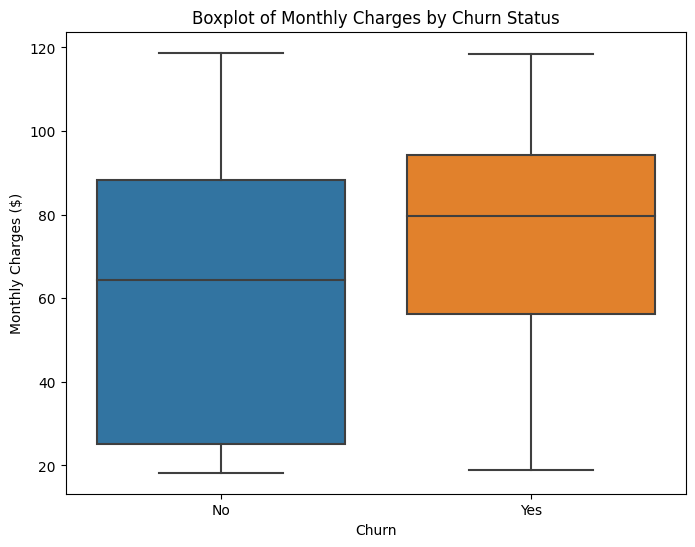

In [70]:
# Setting up the figure for the boxplot
plt.figure(figsize=(8, 6))

# Boxplot for MonthlyCharges by Churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Boxplot of Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')

plt.show()

In [69]:
# Separate the data into groups based on Churn status
monthly_charges_churned = data[data['Churn'] == 'Yes']['MonthlyCharges']
monthly_charges_not_churned = data[data['Churn'] == 'No']['MonthlyCharges']

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(monthly_charges_churned, monthly_charges_not_churned, alternative='two-sided')

print(f'Mann-Whitney U statistic: {statistic}, p-value: {p_value}')

Mann-Whitney U statistic: 6003125.5, p-value: 3.311627651988585e-54


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


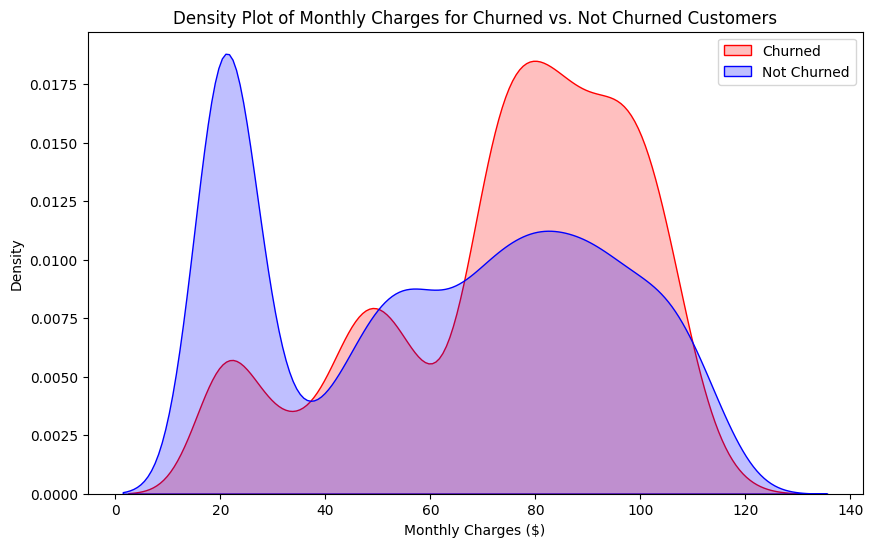

In [71]:
# Setting up the figure for KDE plots
plt.figure(figsize=(10, 6))

# KDE plot for customers who have churned
sns.kdeplot(data[data['Churn'] == 'Yes']['MonthlyCharges'], label='Churned', color='red', fill=True)

# KDE plot for customers who have not churned
sns.kdeplot(data[data['Churn'] == 'No']['MonthlyCharges'], label='Not Churned', color='blue', fill=True)

plt.title('Density Plot of Monthly Charges for Churned vs. Not Churned Customers')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


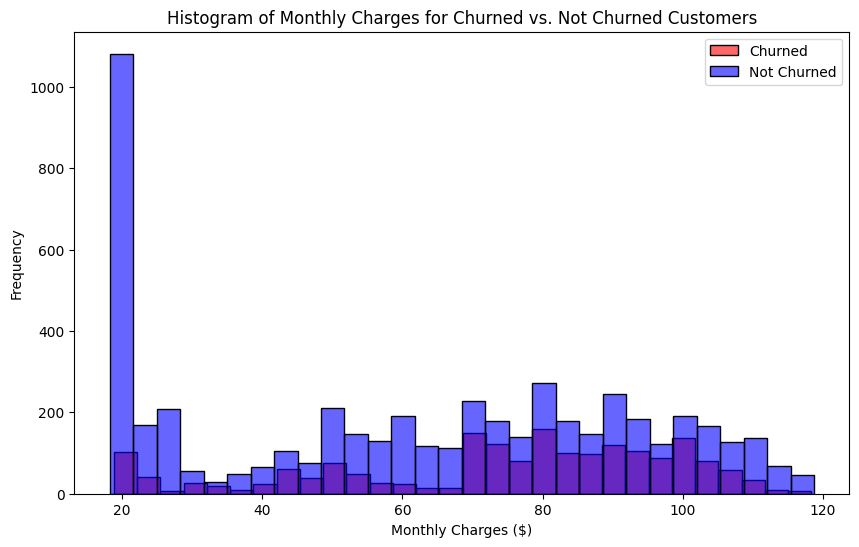

In [72]:
# Setting up the figure for histogram plots
plt.figure(figsize=(10, 6))

# Histogram for customers who have churned
sns.histplot(data[data['Churn'] == 'Yes']['MonthlyCharges'], color='red', label='Churned', alpha=0.6, bins=30)

# Histogram for customers who have not churned
sns.histplot(data[data['Churn'] == 'No']['MonthlyCharges'], color='blue', label='Not Churned', alpha=0.6, bins=30)

plt.title('Histogram of Monthly Charges for Churned vs. Not Churned Customers')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

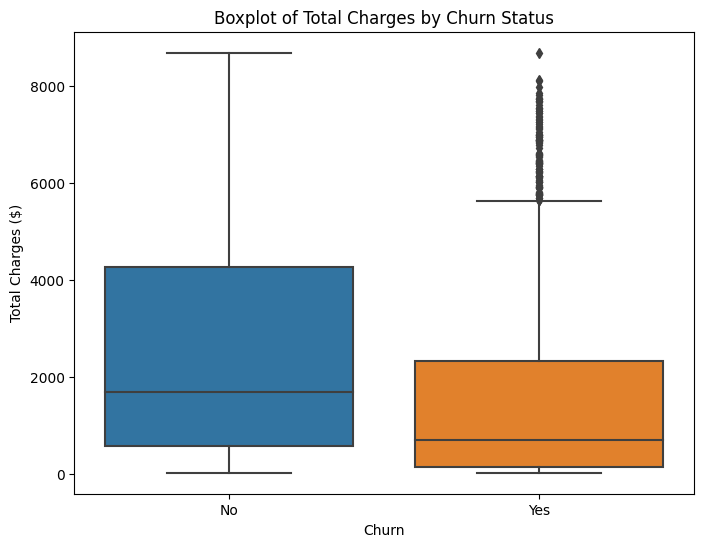

In [74]:
# Setting up the figure for the boxplot
plt.figure(figsize=(8, 6))

# Boxplot for TotalCharges by Churn status
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Boxplot of Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')

plt.show()

In [73]:
# Separate the data into groups based on Churn status
total_charges_churned = data[data['Churn'] == 'Yes']['TotalCharges']
total_charges_not_churned = data[data['Churn'] == 'No']['TotalCharges']

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(total_charges_churned, total_charges_not_churned, alternative='two-sided')

print(f'Mann-Whitney U statistic: {statistic}, p-value: {p_value}')

Mann-Whitney U statistic: 3367925.0, p-value: 1.8396234229657706e-84


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


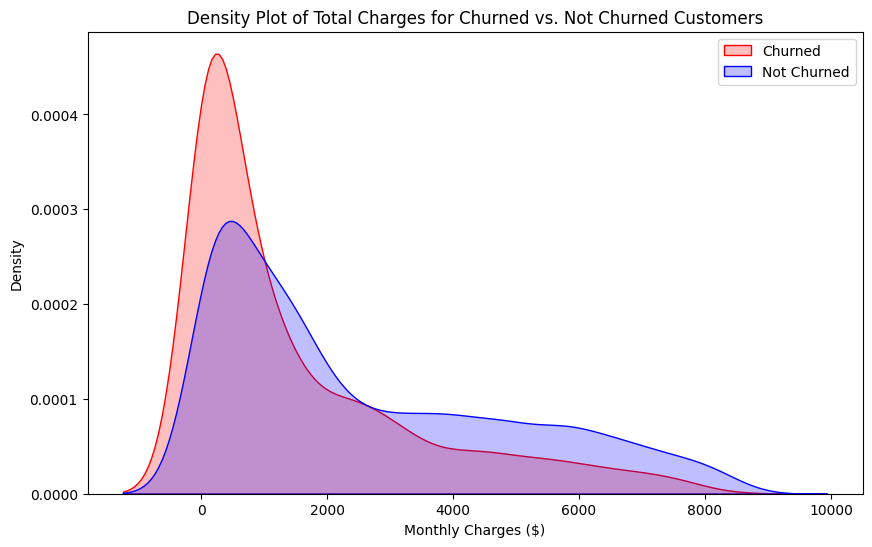

In [75]:
# Setting up the figure for KDE plots
plt.figure(figsize=(10, 6))

# KDE plot for customers who have churned
sns.kdeplot(data[data['Churn'] == 'Yes']['TotalCharges'], label='Churned', color='red', fill=True)

# KDE plot for customers who have not churned
sns.kdeplot(data[data['Churn'] == 'No']['TotalCharges'], label='Not Churned', color='blue', fill=True)

plt.title('Density Plot of Total Charges for Churned vs. Not Churned Customers')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


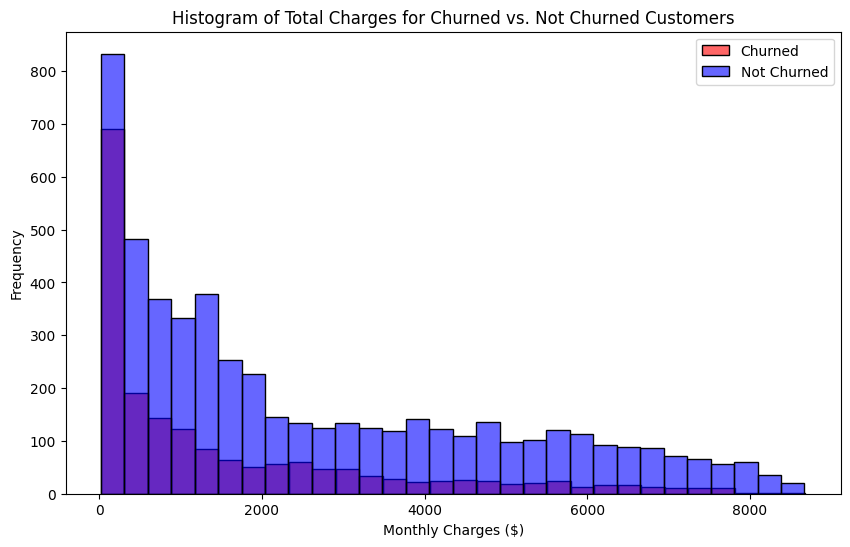

In [76]:
# Setting up the figure for histogram plots
plt.figure(figsize=(10, 6))

# Histogram for customers who have churned
sns.histplot(data[data['Churn'] == 'Yes']['TotalCharges'], color='red', label='Churned', alpha=0.6, bins=30)

# Histogram for customers who have not churned
sns.histplot(data[data['Churn'] == 'No']['TotalCharges'], color='blue', label='Not Churned', alpha=0.6, bins=30)

plt.title('Histogram of Total Charges for Churned vs. Not Churned Customers')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

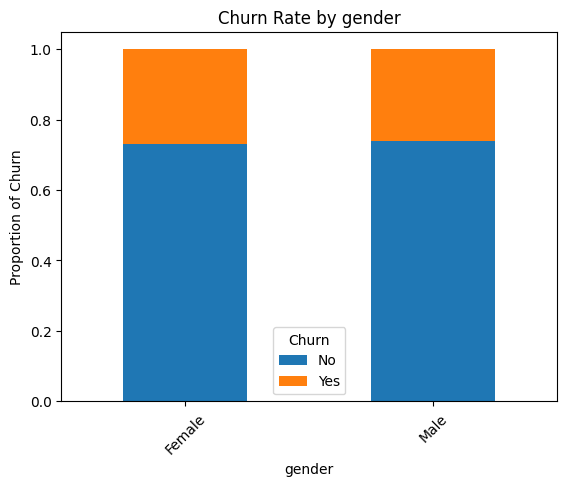

gender - Chi-square statistic: 0.4840828822091383, p-value: 0.48657873605618596


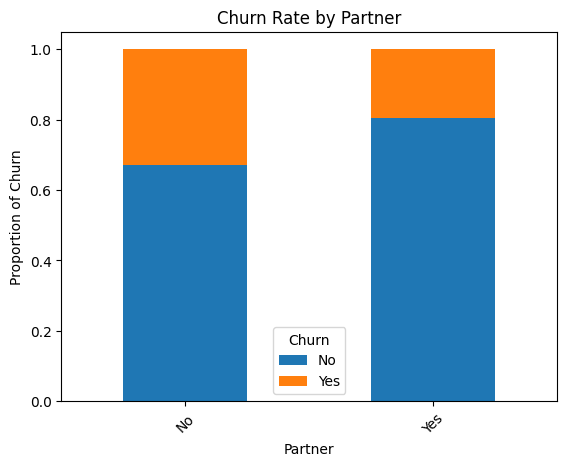

Partner - Chi-square statistic: 158.7333820309922, p-value: 2.1399113440759935e-36


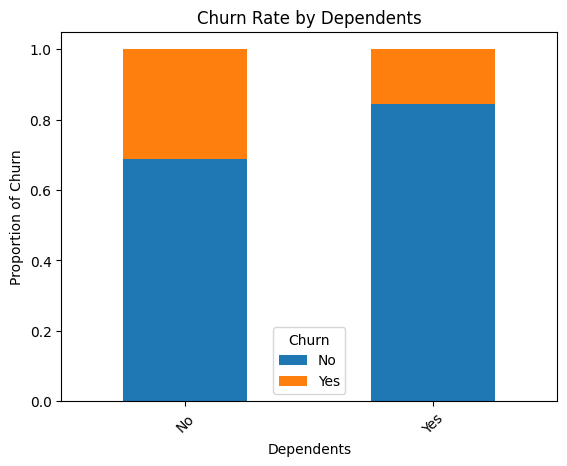

Dependents - Chi-square statistic: 189.12924940423474, p-value: 4.9249216612154196e-43


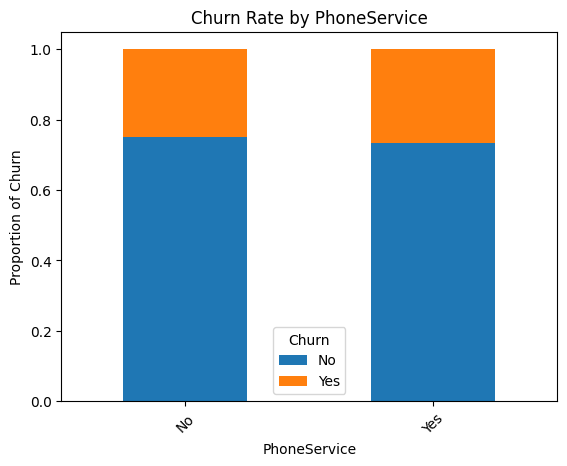

PhoneService - Chi-square statistic: 0.9150329892546948, p-value: 0.3387825358066928


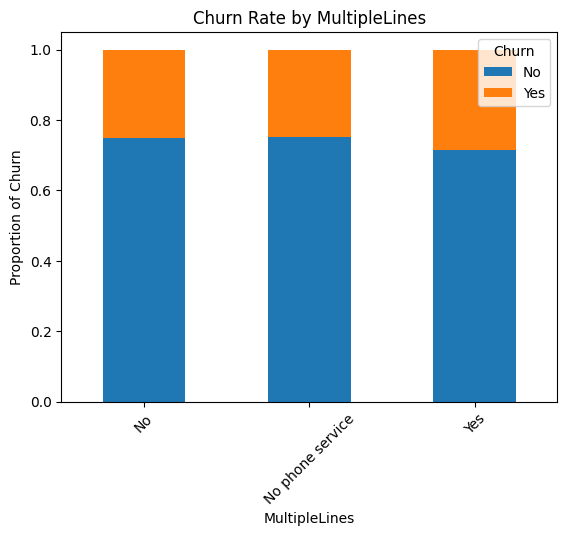

MultipleLines - Chi-square statistic: 11.33044148319756, p-value: 0.0034643829548773


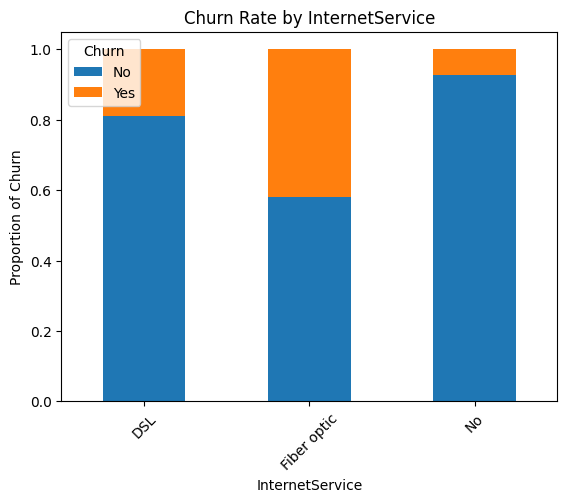

InternetService - Chi-square statistic: 732.309589667794, p-value: 9.571788222840544e-160


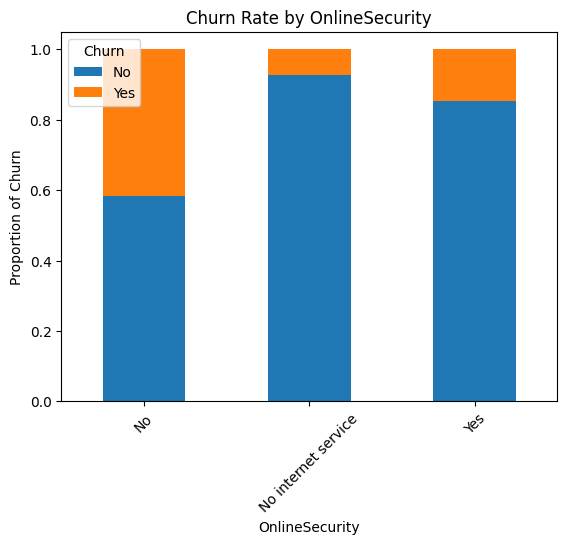

OnlineSecurity - Chi-square statistic: 849.9989679615965, p-value: 2.661149635176552e-185


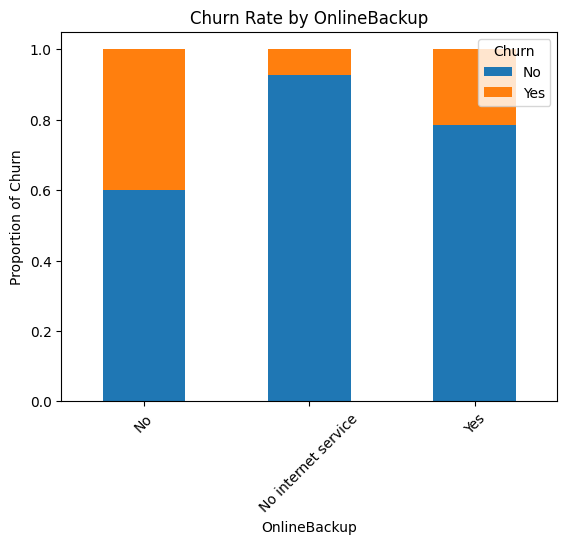

OnlineBackup - Chi-square statistic: 601.812790113409, p-value: 2.0797592160864276e-131


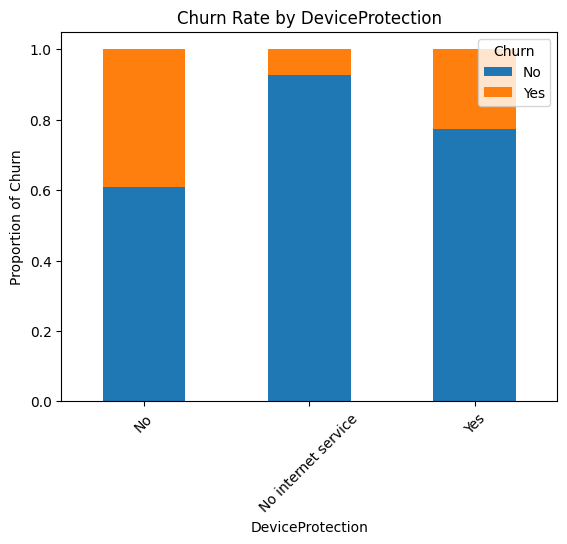

DeviceProtection - Chi-square statistic: 558.419369407389, p-value: 5.505219496457244e-122


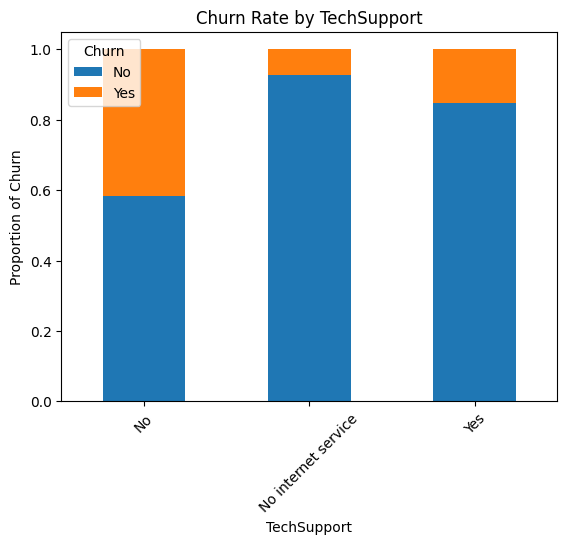

TechSupport - Chi-square statistic: 828.1970684587394, p-value: 1.4430840279998987e-180


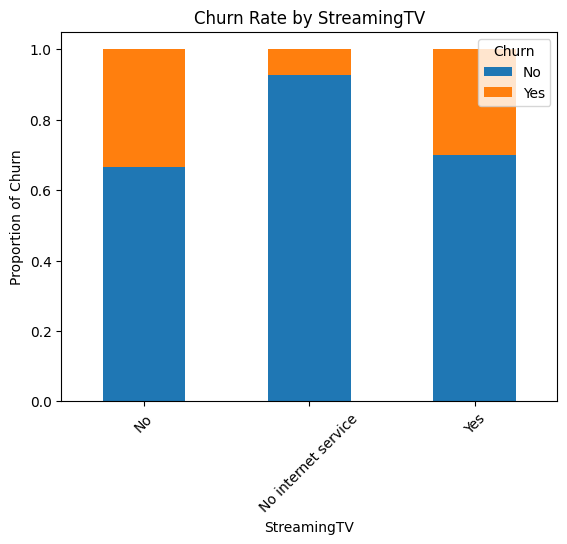

StreamingTV - Chi-square statistic: 374.2039433109813, p-value: 5.528994485739183e-82


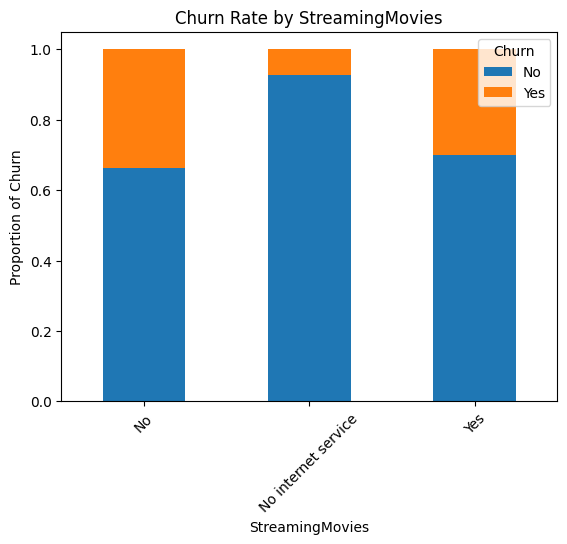

StreamingMovies - Chi-square statistic: 375.6614793452656, p-value: 2.667756755723681e-82


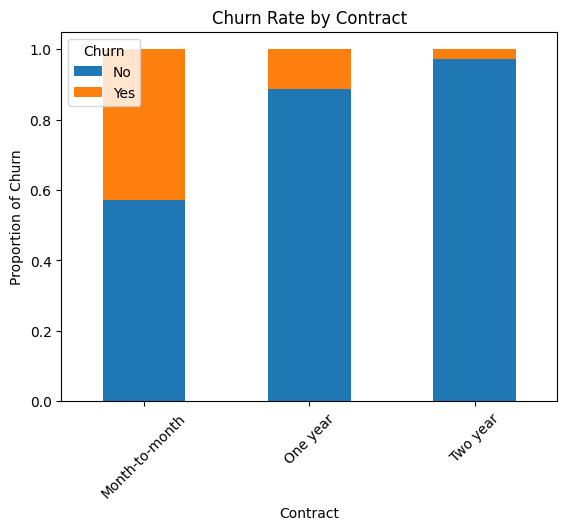

Contract - Chi-square statistic: 1184.5965720837926, p-value: 5.863038300673391e-258


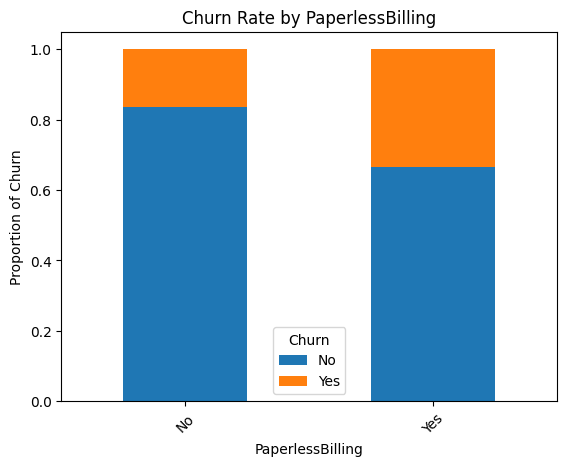

PaperlessBilling - Chi-square statistic: 258.27764906707307, p-value: 4.073354668665985e-58


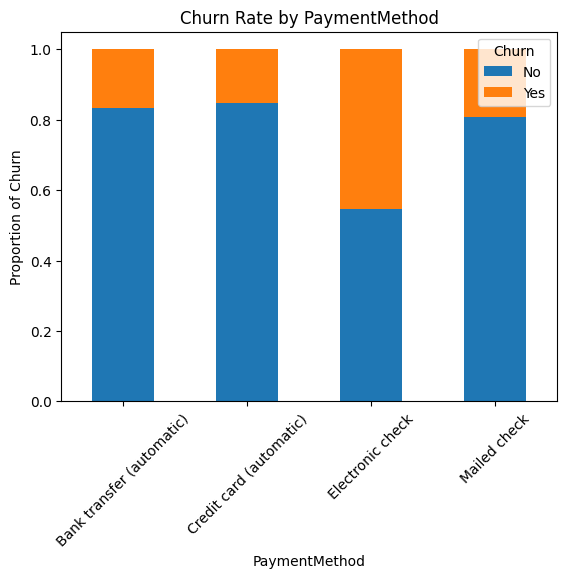

PaymentMethod - Chi-square statistic: 648.1423274814, p-value: 3.6823546520097993e-140


In [15]:
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Loop through each categorical column
for column in categorical_columns:
    # Step 1: Create cross-tabulation
    cross_tab = pd.crosstab(data[column], data['Churn'])

    # Step 2: Visualize with a stacked bar chart
    cross_tab_normalized = cross_tab.div(cross_tab.sum(1), axis=0)
    cross_tab_normalized.plot(kind='bar', stacked=True)
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion of Churn')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

    # Step 3: Chi-square Test
    chi2, p_value, dof, expected = chi2_contingency(cross_tab)
    print(f'{column} - Chi-square statistic: {chi2}, p-value: {p_value}')

**2. Predictive Analytics**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']])
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[947  89]
 [221 152]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1036
           1       0.63      0.41      0.50       373

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



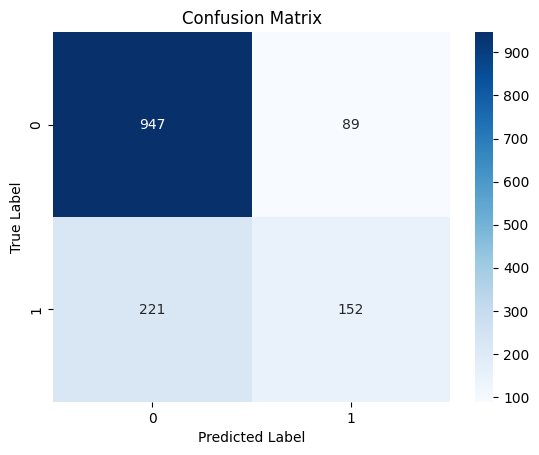

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and predictions
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


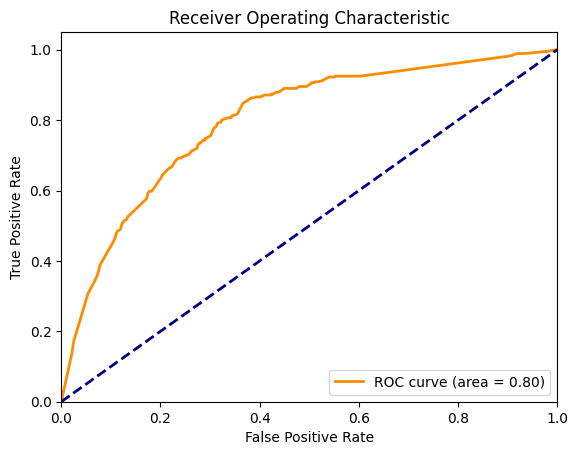

In [80]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities of positive class
probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']])
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Training the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_classifier.predict(X_test)


#Predict and evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}\n")

Accuracy: 76.24%, Precision: 0.58, Recall: 0.41, F1-Score: 0.48, ROC-AUC: 0.65



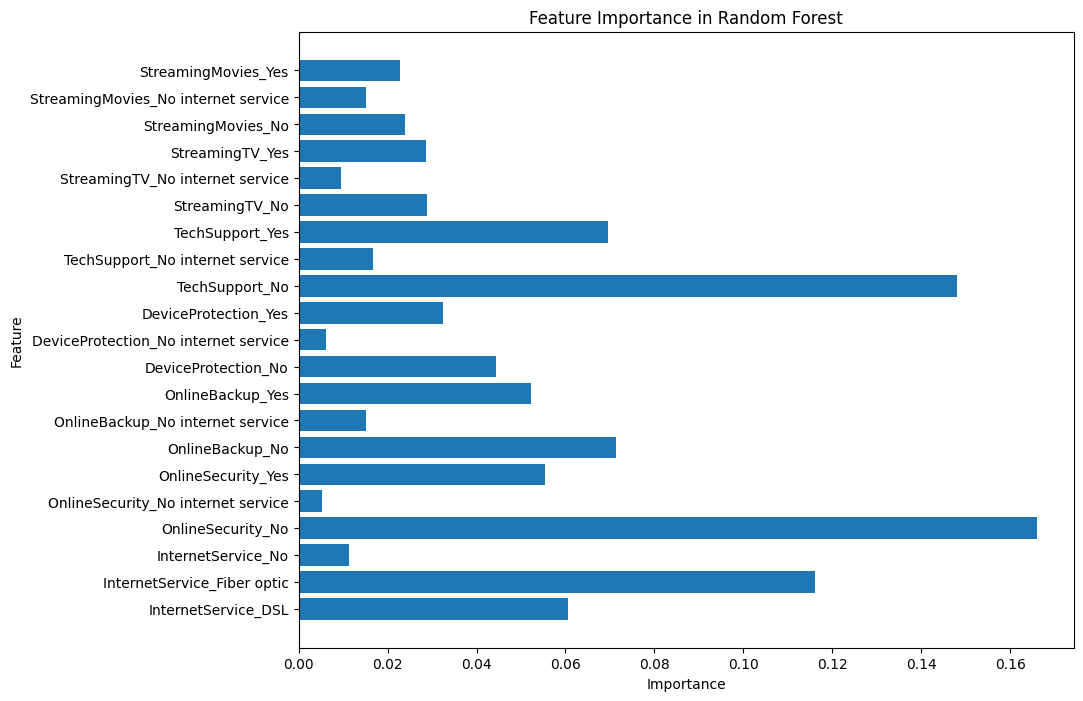

In [ ]:
# Create a bar chart for feature importances
feature_importances = rf_classifier.feature_importances_
features = encoder.get_feature_names_out()

plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

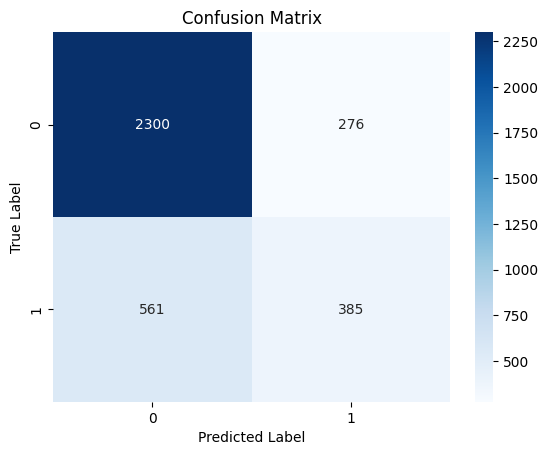

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

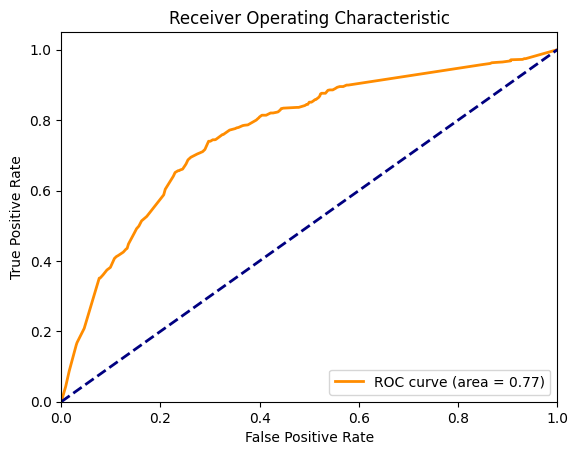

In [10]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities of positive class
probabilities = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVC model
svc = SVC(random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Predict the test set results
y_pred_svc = svc.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)

print(f"Accuracy: {accuracy_svc:.2%}, Precision: {precision_svc:.2f}, Recall: {recall_svc:.2f}, F1-Score: {f1_svc:.2f}, ROC-AUC: {roc_auc_svc:.2f}\n")

Accuracy: 76.55%, Precision: 0.60, Recall: 0.37, F1-Score: 0.46, ROC-AUC: 0.64



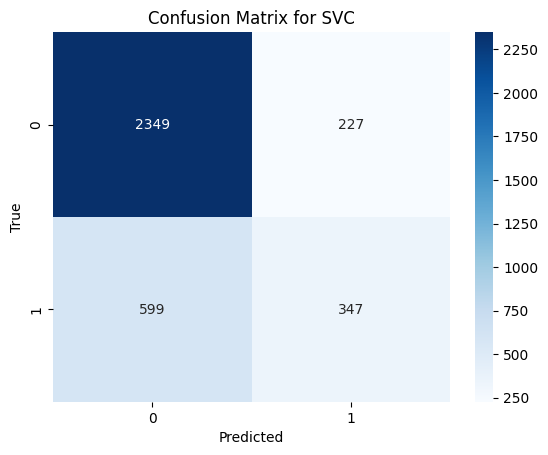

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the test set results
y_pred_svc = svc.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC')
plt.show()

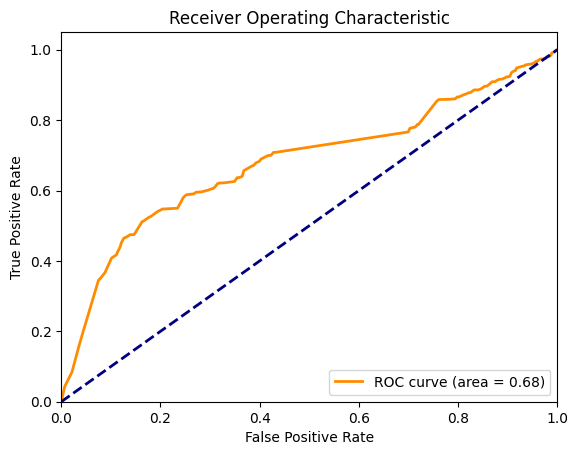

In [19]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()